# Insurance Data Set Project

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)<br/>
    - 3.1  [Pre Profiling](#section301)<br/>
    - 3.2  [Preprocessing](#section302)<br/>
    - 3.3  [Post Profiling](#section303)<br/>
4. [Removing highly correlated Columns](#section4)<br/>
5. [Separating Features (X) and Response (y) from data set](#section5)<br/>
6. [Converting Alphanumeric Data to Numerical Data using Label Encoder](#section6)<br/>
7. [Splitting X and y into training and test datasets.](#section7)<br/>
8. [Decision Tree Model](#section8)<br/>
    - 8.1 [Decision Tree Model without Parameterization](#section8.1)<br/>
    - 8.2 [Decision Tree Model with Parameterization](#section8.2)<br/>
9. [Random Forest Model](#section9)<br/>
    - 9.1 [Random Forest Model without Parameterization](#section9.1)<br/>
    - 9.2 [Random Forest Model with Parameterization](#section9.2)<br/>
10. [Conclusions](#section10)<br/>

<a id = "section1"></a>
### 1. Problem Statement

The notebook explores __Insurance DataSet__ and apply ML alogithms to the dataset

<a id = "section2"></a>
### 2. Data Loading and Description 

__Insurance DataSet__ comprises of 59381 rows X 127 columns. Below is the table showing description of all columns and their description

| Column Name		   |  Description                                                       |
| -----------------    |  ------------                                                      |
|Id			           |  A unique identifier associated with an application.               |
|Product_Info_1-7	   |  A set of normalized variables relating to the product applied for |
|Ins_Age			   |  Normalized age of applicant                                       |
|Ht			           |  Normalized height of applicant                                    |
|Wt			           |  Normalized weight of applicant                                    |
|BMI			       |  Normalized BMI of applicant                                       |
|Employment_Info_1-6   |  A set of normalized variables relating to the employment history of the applicant.|
|InsuredInfo_1-6	   |  A set of normalized variables providing information about the applicant.|
|Insurance_History_1-9 |  A set of normalized variables relating to the insurance history of the applicant.|
|Family_Hist_1-5	   |  A set of normalized variables relating to the family history of the applicant.|
|Medical_History_1-41  |  A set of normalized variables relating to the medical history of the applicant.|
|Medical_Keyword_1-48  |  A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
|Response		       |  This is the target variable, an ordinal variable relating to the final decision associated with an application

### Some background information

Insurance is a contract, represented by a policy, in which an individual or entity receives financial protection or reimbursement against losses from an insurance company.Insurance policies are used to hedge against the risk of financial losses, both big and small, that may result from damage to the insured or her property, or from liability for damage or injury caused to a third party.Insured needs to pay some amount in form of __Premium__ to the insurance company in order to continue the benefits of the insurance policy.

### Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling

from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

### Importing DataSet

In [165]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv', index_col=0)
#data = pd.read_excel('C:\\Users\\Vikas\\Desktop\\INSAID\\Term 1\\Module 2 Machine Learning\\Project\\DataSet.xlsx',index_col=0)
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [3]:
data.shape

(59381, 127)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 58.0+ MB


In [7]:
data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [4]:
data.Response.unique()

array([8, 4, 1, 6, 2, 7, 3, 5], dtype=int64)

In [42]:
data.isnull().sum()

Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
Insurance_History_7        0
                       ...  
Medical_Keyword_20         0
Medical_Keyword_21         0
Medical_Keyword_22         0
Medical_Keywor

<a id = "section3"></a>
## 3. Data Profiling

<a id = "section301"></a>
### 3.1 Pre Profiling

In [41]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="before_preprocessing.html")

<a id = "section302"></a>
### 3.2 Preprocessing

### Handling Missing Values

In [166]:
data.Employment_Info_1.fillna(value = data.Employment_Info_1.median(),inplace=True)

In [167]:
data.Family_Hist_4.fillna(value = data.Family_Hist_4.median(),inplace=True)

In [168]:
data.Employment_Info_6.fillna(value = data.Employment_Info_6.median(),inplace=True)

In [169]:
data.Medical_History_1.fillna(value = data.Medical_History_1.median(),inplace=True)

In [170]:
drop_columns = ['Family_Hist_2','Family_Hist_3','Family_Hist_5','Insurance_History_5','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
data.drop(columns=drop_columns,axis=1,inplace=True)

### Handling Zeros in Data

In [171]:
data.Employment_Info_1.replace(0,data.Employment_Info_1.median(),inplace=True)

In [172]:
data.drop(columns='Employment_Info_4',axis=1,inplace=True)

In [173]:
data.Employment_Info_6.replace(0,data.Employment_Info_6.median(),inplace=True)

In [174]:
data.Medical_History_1.replace(0,data.Medical_History_1.median(),inplace=True)

In [175]:
data.Product_Info_4.replace(0,data.Product_Info_4.median(),inplace=True)

<a id = "section303"></a>
### 3.3 Post Profiling

In [57]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="after_preprocessing.html")

In [58]:
data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.332978,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,0.160191,5.072885,0.279473,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,1.000000,1.000000,0.000182,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,0.087179,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


<a id = "section4"></a>
### 4. Removing highly correlated Columns

In [176]:
insu_history = data.iloc[:,23:30]

In [37]:
insu_history

,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9
Id,,,,,,,
2,1,1,3,1,1,1,2
5,2,1,3,1,1,3,2
6,2,1,1,3,3,2,3
7,2,1,1,3,3,2,3
8,2,1,1,3,3,2,3
10,2,1,3,2,1,3,2
11,1,1,3,2,1,1,2
14,1,1,3,1,1,1,2
15,1,1,3,2,1,1,2


In [38]:
insu_history.corr()

,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9
Insurance_History_1,1.000000,-0.023841,-0.527278,0.567215,0.458606,0.787723,0.508584
Insurance_History_2,-0.023841,1.000000,0.019958,-0.021855,-0.023709,-0.012841,-0.018599
Insurance_History_3,-0.527278,0.019958,1.000000,-0.949388,-0.974910,0.055414,-0.982598
Insurance_History_4,0.567215,-0.021855,-0.949388,1.000000,0.919526,0.024332,0.938654
Insurance_History_7,0.458606,-0.023709,-0.974910,0.919526,1.000000,-0.123853,0.962528
Insurance_History_8,0.787723,-0.012841,0.055414,0.024332,-0.123853,1.000000,-0.068637
Insurance_History_9,0.508584,-0.018599,-0.982598,0.938654,0.962528,-0.068637,1.000000


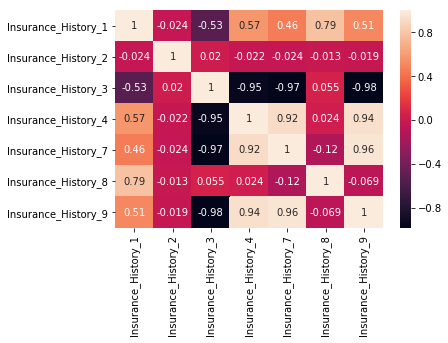

In [177]:
sns.heatmap(insu_history.corr(), annot=True );

'Insurance_History_7','Insurance_History_9' they are highly correlated with 'Insurance_History_4' So we will remove both columns

In [178]:
medi_history = data.iloc[:,53:64]

In [48]:
medi_history

,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36
Id,,,,,,,,,,,
2,1,3,3,1,3,2,3,1,3,1,2
5,1,3,3,1,3,2,3,3,1,1,2
6,2,2,3,1,3,2,3,3,3,1,3
7,1,3,3,1,3,2,3,3,3,1,2
8,2,2,3,1,3,2,3,3,3,1,3
10,1,3,3,1,3,2,3,3,1,1,2
11,1,3,3,1,1,2,3,3,3,1,2
14,1,3,3,1,3,2,3,3,3,1,2
15,1,3,3,1,1,2,3,3,3,1,2


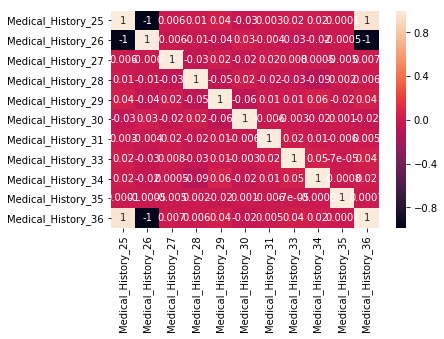

In [181]:
sns.heatmap(medi_history.corr(),annot=True,fmt='.1g');

'Medical_History_36' is highly correlated with 'Medical_History_25'. So we will remove 'Medical_History_36'

In [14]:
col_name = ['Insurance_History_7','Insurance_History_9','Medical_History_36']
data.drop(col_name,inplace=True,axis=1)

<a id = "section5"></a>
### 5. Separating Features (X) and Response (y) from data set

In [15]:
X = data.iloc[:,:114]

In [80]:
X

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0
10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,...,0,0,0,0,0,0,0,0,0,0
11,1,A8,10,0.166194,2,3,1,0.373134,0.581818,0.173640,...,0,0,0,0,0,0,0,0,0,0
14,1,D2,26,0.076923,2,3,1,0.611940,0.781818,0.403766,...,0,0,0,0,0,0,0,0,0,0
15,1,D3,26,0.230769,2,3,1,0.522388,0.618182,0.184100,...,0,0,0,0,0,0,0,0,0,0


In [81]:
print(type(X))
X.shape

<class 'pandas.core.frame.DataFrame'>


(59381, 114)

In [16]:
y = data['Response']

In [112]:
print(y.unique())

[8 4 1 6 2 7 3 5]


In [83]:
print(type(y))
y.shape

<class 'pandas.core.series.Series'>


(59381,)

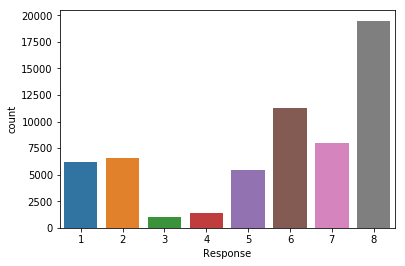

In [154]:
sns.countplot(x=data.Response)

<a id = "section6"></a>
### 6. Converting Product_Info_2 from Alphanumeric Data to Numerical Data using Label Encoder

In [84]:
X.Product_Info_2.unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
Product_Info_2_label = pd.DataFrame()
Product_Info_2_label['Product_Info_2_Encoded'] = X['Product_Info_2']
Product_Info_2_label['Product_Info_2_Encoded'] = LabelEncoder().fit_transform(Product_Info_2_label['Product_Info_2_Encoded'])
Product_Info_2_label['Product_Info_2_Encoded']

Id
2        16
5         0
6        18
7        17
8        15
10       15
11        7
14       15
15       16
16       18
17       16
18       17
19        1
20       14
22       17
23        6
24       17
25       16
26       16
27       17
29       15
31        0
32       17
33        1
34       14
35        5
37        0
39       16
40       17
41       16
         ..
79115     6
79116    15
79117    17
79118    15
79119    16
79120    16
79121    16
79122    17
79123    16
79124    17
79126     0
79127    17
79128    15
79130    15
79131    14
79132    14
79133    18
79134    17
79135    14
79136    16
79137    16
79138    16
79139    17
79140    17
79141    10
79142    14
79143    16
79144    18
79145    15
79146     7
Name: Product_Info_2_Encoded, Length: 59381, dtype: int64

In [18]:
X.drop(columns = 'Product_Info_2',axis = 1,inplace=True)
X

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,,,,,,,,,,,,,,,,,,,,,
2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,0,0
5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,0
7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,0,0
8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,0,0
10,1,26,0.230769,3,1,1,0.507463,0.836364,0.299163,0.364887,...,0,0,0,0,0,0,0,0,0,0
11,1,10,0.166194,2,3,1,0.373134,0.581818,0.173640,0.376587,...,0,0,0,0,0,0,0,0,0,0
14,1,26,0.076923,2,3,1,0.611940,0.781818,0.403766,0.571612,...,0,0,0,0,0,0,0,0,0,0
15,1,26,0.230769,2,3,1,0.522388,0.618182,0.184100,0.362643,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X['Product_Info_2_Encoded'] = Product_Info_2_label['Product_Info_2_Encoded']
X

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2_Encoded
Id,,,,,,,,,,,,,,,,,,,,,
2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,0,16
5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,18
7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,0,17
8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,0,15
10,1,26,0.230769,3,1,1,0.507463,0.836364,0.299163,0.364887,...,0,0,0,0,0,0,0,0,0,15
11,1,10,0.166194,2,3,1,0.373134,0.581818,0.173640,0.376587,...,0,0,0,0,0,0,0,0,0,7
14,1,26,0.076923,2,3,1,0.611940,0.781818,0.403766,0.571612,...,0,0,0,0,0,0,0,0,0,15
15,1,26,0.230769,2,3,1,0.522388,0.618182,0.184100,0.362643,...,0,0,0,0,0,0,0,0,0,16


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 117 entries, Product_Info_1 to Product_Info_2_Encoded
dtypes: float64(9), int64(108)
memory usage: 53.5 MB


<a id = "section7"></a>
### 7. Splitting X and y into training and test datasets

In [21]:
from sklearn.cross_validation import train_test_split

def split(X,y):
    return train_test_split(X,y,test_size=0.20, random_state=1)

In [22]:
X_train,X_test,y_train,y_test = split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (47504, 114)
y_train shape:  (47504,)

Test cases as below
X_test shape:  (11877, 114)
y_test shape:  (11877,)


<a id = "section8"></a>
### 8. Decision Tree Model

<a id = "section8.1"></a>
### 8.1 Decision Tree Model without Parameterization

In [24]:
from sklearn import tree
model_decision_tree = tree.DecisionTreeClassifier(random_state = 0)
model_decision_tree.fit(X_train, y_train)

y_predict_decision_tree = model_decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_predict_decision_tree))

Accuracy score for test data is: 0.3923549717942241


<a id = "section8.2"></a>
### 8.2 Decision Tree Model with Parameterization

In [63]:
from sklearn import tree
model_decision_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=70, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, 
                            presort=False,random_state = 1)
model_decision_tree.fit(X_train, y_train)

y_predict_decision_tree = model_decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_predict_decision_tree))

Accuracy score for test data is: 0.51014565967837


<a id = "section9"></a>
### 9. Random Forest Model

<a id = "section9.1"></a>
### 9.1 Random Forest Model without Parameterization

In [64]:
from sklearn.ensemble import RandomForestClassifier

model_noparameters = RandomForestClassifier(random_state=0)

model_noparameters.fit(X_train, y_train)

y_predict_test_tunned = model_noparameters.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_predict_test_tunned))


Accuracy score for test data is: 0.46627936347562515


In [92]:
model_noparameters.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>

<a id = "section9.2"></a>
### 9.2 Random Forest Model with Parameterization

In [97]:
from sklearn.ensemble import RandomForestClassifier

model_ran_tunned = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

model_ran_tunned.fit(X_train, y_train)

y_predict_test_tunned = model_ran_tunned.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_predict_test_tunned))

Accuracy score for test data is: 0.526732339816452


Text(0,0.5,'Accuracy Score of each Algorithm')

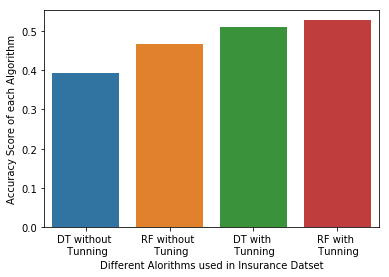

In [142]:
accuracy_name = ['DT without \n Tunning','RF without \n Tuning','DT with \n Tunning','RF with \n Tunning']
accuracy_value = [0.3923,0.4662,0.5101,0.5267]
sns.barplot(x=accuracy_name,y=accuracy_value)
plt.xlabel("Different Alorithms used in Insurance Datset")
plt.ylabel("Accuracy Score of each Algorithm")

<a id = "section10"></a>
### 10. Conclusion

- After applying different basic ML algorithms on __insurance dataset__,
- From section 8.1 and 8.2 we can say, that accuracy score of Decision Model is increased from 0.3923 to 0.5101
- From section 9.1 and 9.2 we can say, that accuracy score of Random Forest is increased from 0.4662 to 0.5267
- Further Enhancement will be done in order to further increase the accuracy score by using Advanced ML Algorithms like "xgboost".